LSTM for Sentiment classification in IMDB dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
np.random.seed(117)

In [2]:
top_words=5000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(25000,)

In [4]:
max(np.max(x_train))

4987

In [5]:
max(np.max(x_test))

4998

In [6]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [7]:
# Padding is required for making same length in each IMDB review.
from keras.utils import pad_sequences

In [8]:
max_review_length=600
x_train= pad_sequences(x_train, maxlen=max_review_length)
x_test= pad_sequences(x_test, maxlen=max_review_length)

In [9]:
x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [10]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
'''
embedding_vector_length=32

model= Sequential() 
model.add(Embedding(top_words,32,input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)
'''

"\nembedding_vector_length=32\n\nmodel= Sequential() \nmodel.add(Embedding(top_words,32,input_length=max_review_length))\nmodel.add(LSTM(100))\nmodel.add(Dense(1,activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])\nhistory=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)\n"

Pandas Datareader

In [12]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas_datareader as pdr
key= '37a72331c554b45b9491d428c52d54e4f59f80ec'

In [14]:
df= pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-14-cd1655025846>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df= pdr.get_data_tiingo('AAPL', api_key=key)


In [15]:
df.to_csv('apple.csv')

In [16]:
df= pd.read_csv('/content/apple.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-01 00:00:00+00:00,169.10,169.20,165.27,166.41,53569376,40.297965,40.321796,39.385244,39.656915,214277504,0.0,1.0
1,AAPL,2018-05-02 00:00:00+00:00,176.57,177.75,173.80,175.23,66539371,42.078129,42.359333,41.418015,41.758796,266157484,0.0,1.0
2,AAPL,2018-05-03 00:00:00+00:00,176.89,177.50,174.44,175.88,34068180,42.154388,42.299756,41.570532,41.913697,136272720,0.0,1.0
3,AAPL,2018-05-04 00:00:00+00:00,183.83,184.25,178.17,178.25,56201317,43.808249,43.908339,42.459423,42.478488,224805268,0.0,1.0
4,AAPL,2018-05-07 00:00:00+00:00,185.16,187.67,184.75,185.18,42451423,44.125199,44.723354,44.027493,44.129966,169805692,0.0,1.0


In [17]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-04-24 00:00:00+00:00,165.33,165.600,163.8900,165.000,41949581,165.33,165.600,163.8900,165.000,41949581,0.0,1.0
1254,AAPL,2023-04-25 00:00:00+00:00,163.77,166.305,163.7300,165.190,48714063,163.77,166.305,163.7300,165.190,48714063,0.0,1.0
1255,AAPL,2023-04-26 00:00:00+00:00,163.76,165.280,162.8000,163.055,44105745,163.76,165.280,162.8000,163.055,44105745,0.0,1.0
1256,AAPL,2023-04-27 00:00:00+00:00,168.41,168.560,165.1900,165.190,64902329,168.41,168.560,165.1900,165.190,64902329,0.0,1.0
1257,AAPL,2023-04-28 00:00:00+00:00,169.68,169.850,167.8801,168.490,55275851,169.68,169.850,167.8801,168.490,55275851,0.0,1.0


In [18]:
df1= df.reset_index()['close']
df1

0       169.10
1       176.57
2       176.89
3       183.83
4       185.16
         ...  
1253    165.33
1254    163.77
1255    163.76
1256    168.41
1257    169.68
Name: close, Length: 1258, dtype: float64

In [19]:
df1.isnull().sum()

0

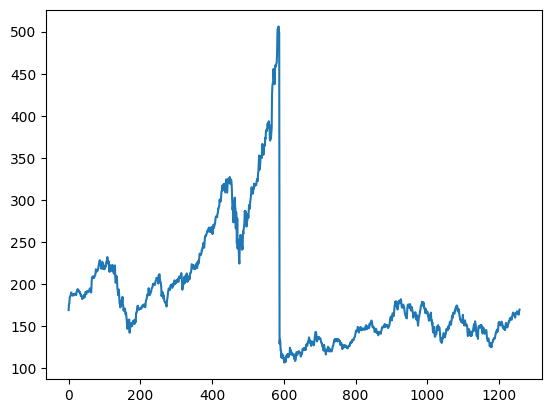

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [21]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))# E.g. 50 rows and 1 column

In [22]:
df1

array([[0.15594239],
       [0.17465247],
       [0.17545398],
       ...,
       [0.14256731],
       [0.15421415],
       [0.15739512]])

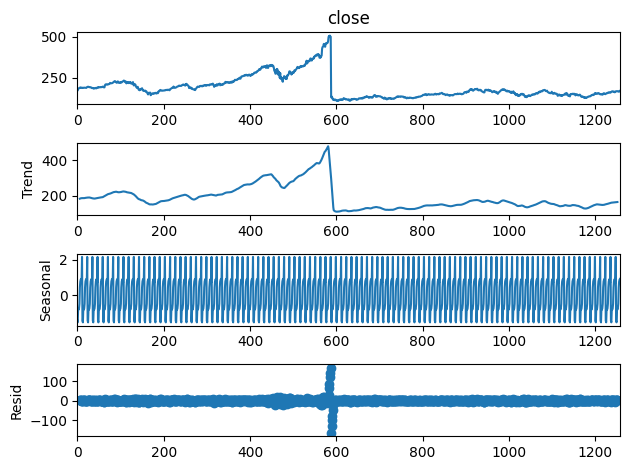

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(df['close'],model='additive',period=12)
decomposition.plot()
plt.show()

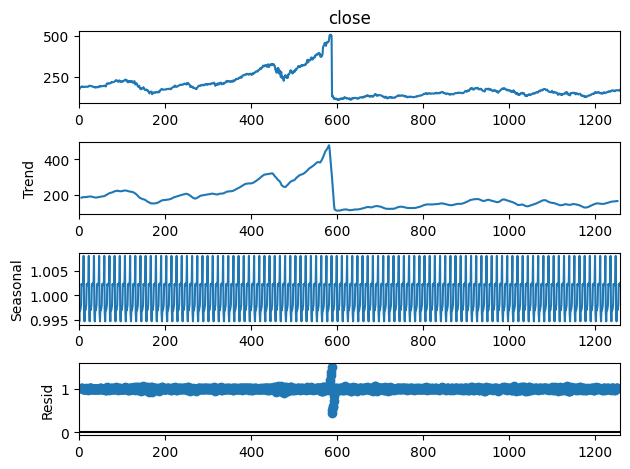

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(df['close'],model='multiplicative',period=12)
decomposition.plot()
plt.show()

In [25]:
# Split the data into train and test
train_size= int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data, test_data= df1[0:train_size,:], df1[train_size:len(df1),:1]

In [26]:
train_data.shape

(817, 1)

In [27]:
test_data.shape

(441, 1)

In [28]:
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax), np.array(datay)

In [29]:
# Cross validation approach
time_step=100
x_train, y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data, time_step)

In [30]:
print(x_train.shape, x_test.shape)

(716, 100) (340, 100)


In [31]:
x_train

array([[0.15594239, 0.17465247, 0.17545398, ..., 0.27902317, 0.27934878,
        0.28350657],
       [0.17465247, 0.17545398, 0.19283657, ..., 0.27934878, 0.28350657,
        0.27757044],
       [0.17545398, 0.19283657, 0.19616781, ..., 0.28350657, 0.27757044,
        0.28541014],
       ...,
       [0.04578585, 0.03812148, 0.03328741, ..., 0.09845961, 0.09658109,
        0.10008766],
       [0.03812148, 0.03328741, 0.03651847, ..., 0.09658109, 0.10008766,
        0.10449593],
       [0.03328741, 0.03651847, 0.02384471, ..., 0.10008766, 0.10449593,
        0.10557295]])

In [32]:
# Durbin watson test for checking Auto correlation
import statsmodels.api as sm

In [33]:
sm.stats.durbin_watson(df['close'])

0.0031649238442697327

As Durbin watson test value<1.5. There is auto correlation.

In [34]:
df1

array([[0.15594239],
       [0.17465247],
       [0.17545398],
       ...,
       [0.14256731],
       [0.15421415],
       [0.15739512]])

In [35]:
# reshape the dataset- LSTM - 3D
# sample, timesteps, features

x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [37]:
# Build LSTM model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [43]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 341ms/step - loss: 0.0369 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0147 - val_loss: 6.2777e-04
Epoch 3/100
12/12 [==============================] - 4s 336ms/step - loss: 0.0119 - val_loss: 0.0023
Epoch 4/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0110 - val_loss: 4.6726e-04
Epoch 5/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0090 - val_loss: 3.7517e-04
Epoch 6/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0079 - val_loss: 6.3970e-04
Epoch 7/100
12/12 [==============================] - 3s 272ms/step - loss: 0.0074 - val_loss: 5.0534e-04
Epoch 8/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0070 - val_loss: 0.0010
Epoch 9/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0062 - val_loss: 5.4527e-04
Epoch 10/100
12/12 [==============================] - 3s 228ms/ste

In [44]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

11/11 [==============================] - 1s 44ms/step


In [46]:
# Transform your data into original form
train_pred= scaler.inverse_transform(train_pred)
test_pred= scaler.inverse_transform(test_pred)

In [47]:
import math

In [48]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

225.81198141126134

In [49]:
math.sqrt(mean_squared_error(y_test,test_pred))

153.57932915592372

In [51]:
len(test_data)

441

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input= list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.1102817783343769

In [58]:
data_new= np.arange(1,100)
data_pred=np.arange(100,130)

In [ ]:
# Predict the data for 10 days

my_output=[]


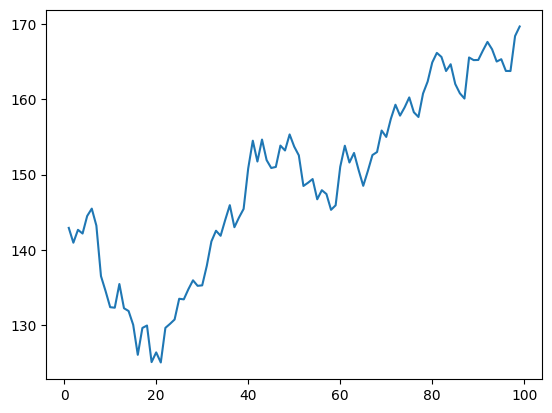

In [59]:
import matplotlib.pyplot as plt
plt.plot(data_new,scaler.inverse_transform(df1[1159:]))

In [55]:
len(df1)

1258